# Logistic Regression with Python

This notebook demonstrates how to use a `logistic regression` machine learning model to predict which passengers survived the Titanic shipwreck. Data sets (`titanic_train.csv`, `titanic_test.csv`) are from [Kaggle.com](https://www.kaggle.com/c/titanic/overview).

[Kaggle](https://www.kaggle.com/) also holds a machine learning competition in which this Titanic data sets are provided as train and test data. See the YouTube video for knowing how to get started with the competition.

In [1]:
%%html
<iframe
    width="560"
    height="315"
    src="https://www.youtube.com/embed/8yZMXCaFshs"
    title="YouTube video player"
    frameborder="0" 
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
    allowfullscreen>
</iframe>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Missing Data

<AxesSubplot:>

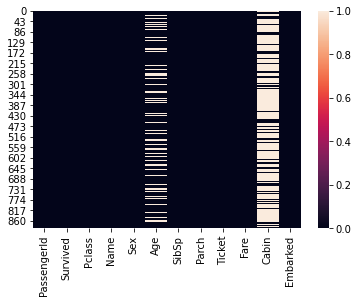

In [4]:
# Use as seaborn heatmap to visualize missing data
# train.isnull() to detect missing values
sns.heatmap(train.isnull())

<AxesSubplot:>

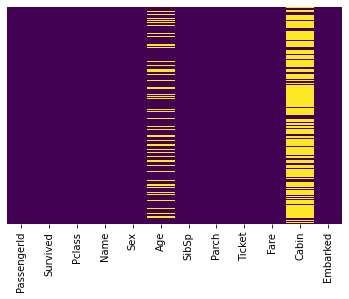

In [5]:
# Other way of visualizing missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<font color=magenta>From the above heatmap, we can see that the `Age` column has some data cells that are missing values (colored in yellow) and the `Cabin` columns has a lot of missing-value data cells.</font>

<AxesSubplot:xlabel='Survived', ylabel='count'>

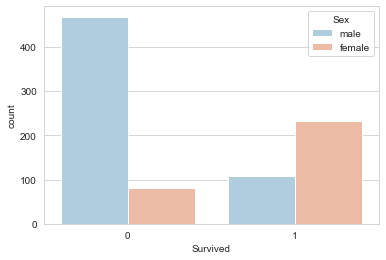

In [6]:
# Explore the 'Sex' and 'Survived' relation
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<font color=magenta>Looking at the above chart, we can see that (*in the training data set*) most of the people who didn't survive (`0`) are `male`, while more `female` survived (`1`) - number of `female`s who did survive is almost about twice of number of survived `male`s.</font>

<AxesSubplot:xlabel='Survived', ylabel='count'>

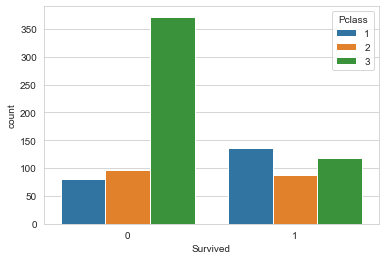

In [7]:
# Explore the 'Ticket class' and 'Survived' relationship
# 1 = 1st, 2 = 2nd, 3 = 3rd
sns.countplot(x='Survived', hue='Pclass', data=train)

<font color=magenta>The above chart suggests us that it looks like people who did not survive were overwhelmingly part of `3rd class` (the lowest class - the cheapest to get on to).</font>

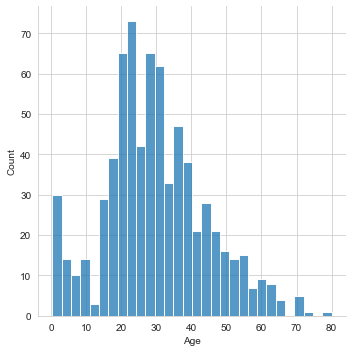

In [8]:
# Explore 'Age' distribution
sns.displot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

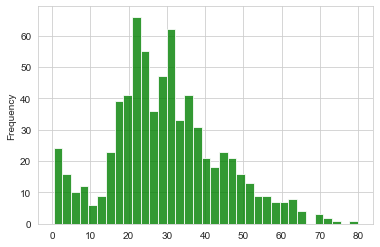

In [9]:
# Another way of visualizing frequency of 'Age'
train['Age'].plot.hist(bins=35, color='green', alpha=0.8)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

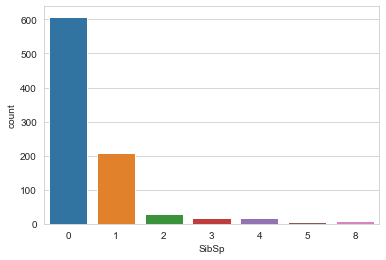

In [10]:
# Explore 'SibSp' - '# of siblings / spouses aboard the Titanic'
sns.countplot(x='SibSp', data=train)

<font color=magenta>From the above `countplot`, we can infer that most people aboard did not have neither children or a spouse onboard.</font>

<AxesSubplot:>

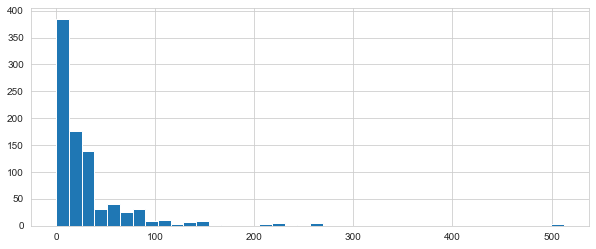

In [11]:
# Explore 'Fare' - 'Passenger fare'
train['Fare'].hist(bins=40, figsize=(10, 4))

<font color=magenta>From the above `histogram`, it looks like most of the tickets are less than `$12.5` (`100/8`) and almost were less than `$50`. This is consistent with the fact that most of the tickets are in the `3rd` class (the cheapest ticket class as we saw in one of the above plot).</font>

<AxesSubplot:>

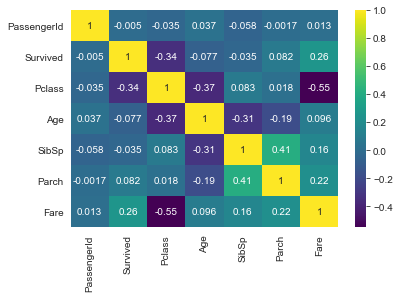

In [12]:
# Explore the correlation between data features
sns.heatmap(train.corr(), annot=True, cmap='viridis')

## Creating Interactive Plots with [Cufflinks](https://github.com/santosjorge/cufflinks) and [Plotly Express](https://plotly.com/python/plotly-express/)

In [13]:
import cufflinks as cf
import plotly.express as px

In [14]:
# Uncomment the following line of code if you want
# the plotly.js library will be loaded locally
cf.go_offline()

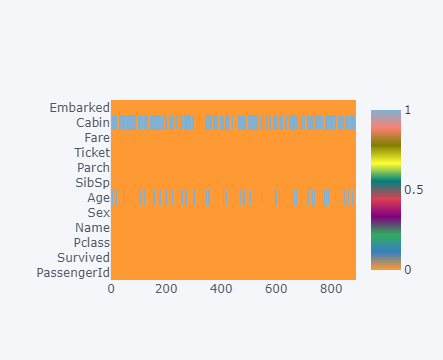

In [15]:
# Use a heatmap to visualize missing data
# train.isnull() returns a dataframe of booleans
# .astype(int) converts that dataframe of booleans to dataframe of 0/1
train.isnull().astype(int).iplot(kind='heatmap')

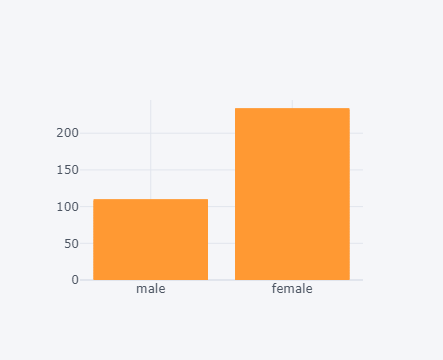

In [16]:
train[['Survived', 'Sex']].iplot(kind='bar', x='Sex', y='Survived')

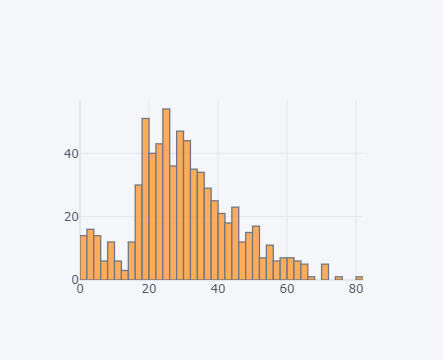

In [17]:
# 'Age' distribution
train['Age'].dropna().iplot(kind='histogram', bins=40)

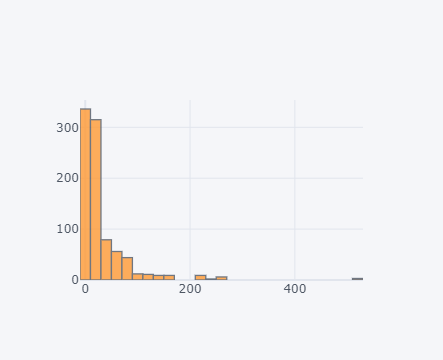

In [18]:
# Explore 'Fare' column
train['Fare'].iplot(kind='hist', bins=40)

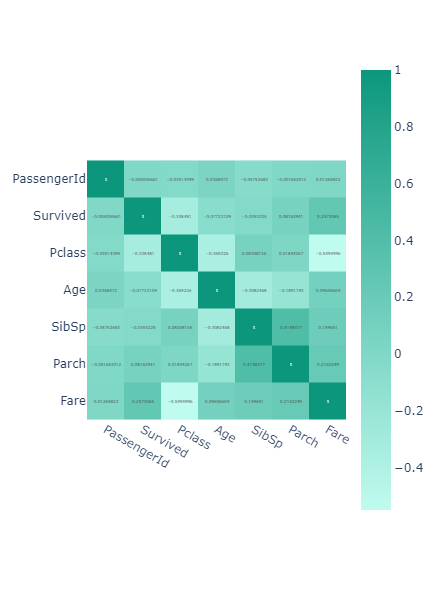

In [19]:
# Correlation
heatmap = px.imshow(
    train.corr(),
    text_auto=True,
    width=600, height=600,
    color_continuous_scale=['#C0FBEF', '#0C977C']
)
heatmap.show()

## Data Cleaning

We want to fill in missing `Age` data instead of just dropping the missing `Age` data rows. One way to do this is by filling in the *mean* age of all the passengers (imputation). However we can be smarter about this and check the average age by `passenger class`. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

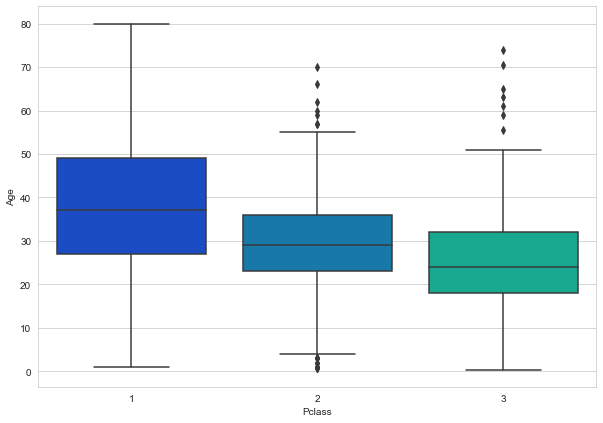

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

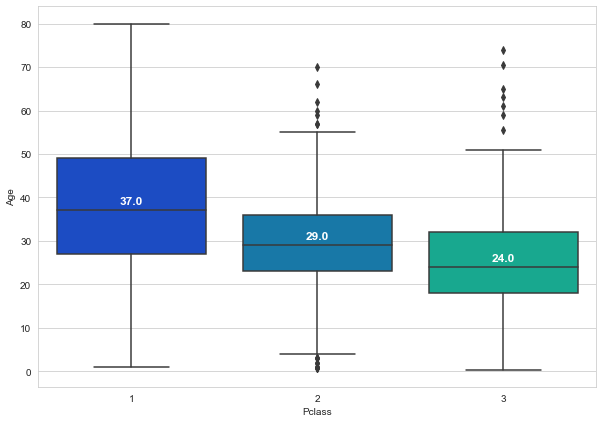

In [21]:
# Create and display a box plot
plt.figure(figsize=(10, 7))
box_plot = sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Find median for each box (regtangle) in the chart
medians = train.groupby(['Pclass'])['Age'].median()

# Calculate vertical offset (offset from median) to display median values
vertical_offset = train['Age'].median() * 0.05

# Show medians
for xtick in box_plot.get_xticks():
    box_plot.text(
        xtick,
        medians[xtick + 1] + vertical_offset,
        medians[xtick + 1],
        horizontalalignment='center',
        size='large',
        color='w',
        weight='semibold'
    )

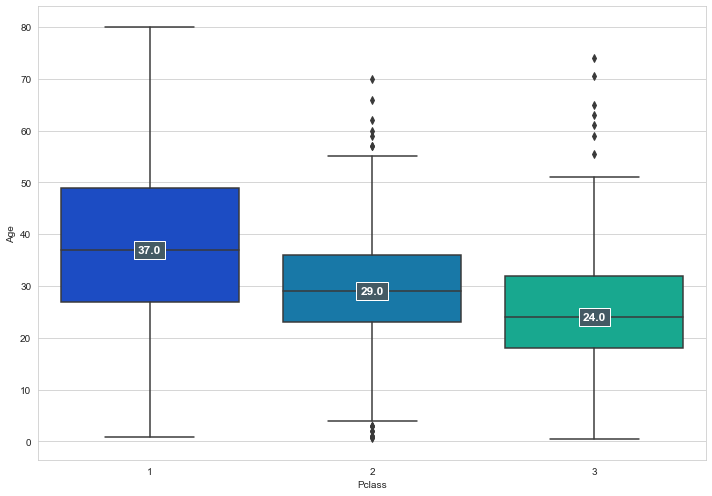

In [22]:
# Plot the same boxplot but by deriving median from the plot itself
# without exclusively computing median from data

# Create and display a box plot
plt.figure(figsize=(10, 7))
box_plot = sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # Every 4th line at the interval of 6 is median line
    # 0 -> p25
    # 1 -> p75
    # 2 -> lower whisker
    # 3 -> upper whisker
    # 4 -> p50
    # 5 -> upper extreme value
    y = round(lines[4 + cat * 6].get_ydata()[0], 1)
    
    ax.text(
        cat,
        y,
        f'{y}',
        ha='center',
        va='center',
        fontweight='bold',
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64')
    )

box_plot.figure.tight_layout()

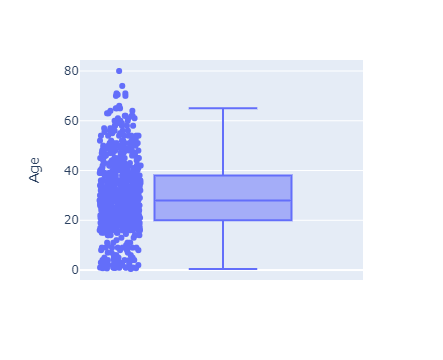

In [23]:
# Use plotly to plot out the median 'Age' of all passengers
box_plot = px.box(train, y='Age', points='all')
box_plot.show()

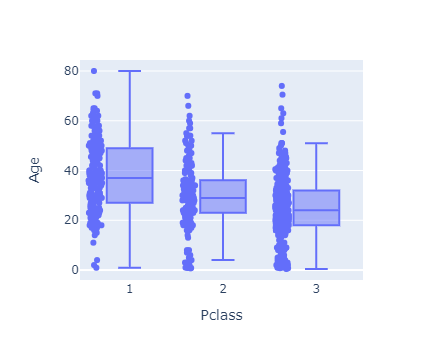

In [24]:
# Use plotly to nunique the exact mean of 'Age' for each 'Pclass'
# points='all' - display underlying data points
box_plot = px.box(train, x='Pclass', y='Age', points='all')
box_plot.show()

<font color=magenta>We use the mean values of the `Age` for each `Pclass` to fill in the `Age` data cells that are missing data (null).</font>

In [25]:
# Define a function to fill in missing-age data cells
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
        else:
            return 28 # median age of all customers in train dataset
    return Age

In [26]:
# Apply the above function to fill in missing age values
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

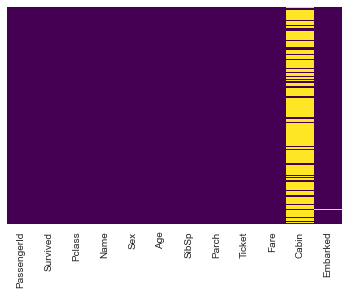

In [27]:
# Check that there is no data cells that are missing 'Age'
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
# The 'Cabin' columns has too many missing-value cells,
# it is therefore reasonable to drop the column.
# Note that, we can create another data feature (column)
# expressing whether 'Cabin' is known or not, but this example
# it is acceptable to just drop the 'Cabin' data feature
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

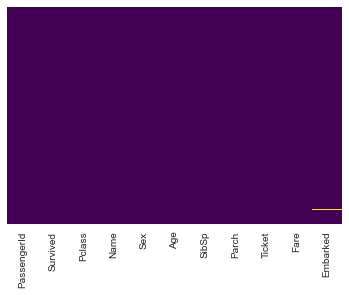

In [29]:
# Check that the 'Cabin' column has been dropped
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
# Now, 'only few' rows are missing values for 'Embarked'
# We can just drop those few rows
train.dropna(inplace=True)

<AxesSubplot:>

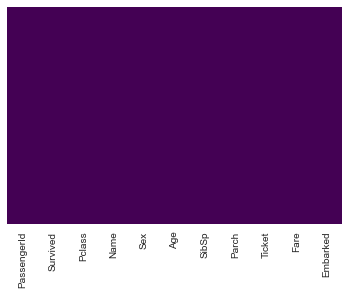

In [31]:
# Check again that no data cells are missing value now
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [32]:
# Check information of columns of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
